In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore 
df=pd.read_csv("data/satellite_telemetry.csv")
df.head()

,Timestamp,Sensor_ID,Temperature,Voltage,Current
0,01-01-2025 00:00,S07,52.356220,4.125585,1.130391
1,01-01-2025 00:00,S20,62.817989,3.990806,1.203538
2,01-01-2025 00:00,S15,28.433768,3.837356,0.481779
3,01-01-2025 00:00,S11,39.755519,3.098680,0.780707
4,01-01-2025 00:00,S08,37.646965,3.501917,0.879381


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    5000 non-null   object 
 1   Sensor_ID    5000 non-null   object 
 2   Temperature  5000 non-null   float64
 3   Voltage      5000 non-null   float64
 4   Current      5000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 195.4+ KB


In [4]:
df.describe()

,Temperature,Voltage,Current
count,5000.000000,5000.000000,5000.000000
mean,45.326983,3.600837,0.910233
std,11.609196,0.349207,0.344184
min,6.633445,3.000189,0.300303
25%,37.904794,3.294838,0.620063
50%,44.863611,3.594702,0.914344
75%,51.942337,3.910956,1.201970
max,119.288385,4.199766,1.499910


In [5]:
df.isnull().sum()

Timestamp      0
Sensor_ID      0
Temperature    0
Voltage        0
Current        0
dtype: int64

In [6]:
df.columns

Index(['Timestamp', 'Sensor_ID', 'Temperature', 'Voltage', 'Current'], dtype='object')

In [7]:
df.size

25000

In [8]:
df.dtypes

Timestamp       object
Sensor_ID       object
Temperature    float64
Voltage        float64
Current        float64
dtype: object

In [9]:
numeric_col=df[["Temperature","Voltage","Current"]]
numeric_col.head()

,Temperature,Voltage,Current
0,52.356220,4.125585,1.130391
1,62.817989,3.990806,1.203538
2,28.433768,3.837356,0.481779
3,39.755519,3.098680,0.780707
4,37.646965,3.501917,0.879381


In [10]:
numeric_col.corr()

,Temperature,Voltage,Current
Temperature,1.000000,-0.005378,-0.002362
Voltage,-0.005378,1.000000,0.002732
Current,-0.002362,0.002732,1.000000


In [11]:
df['power']=df['Current']*df['Voltage']
df.head()

,Timestamp,Sensor_ID,Temperature,Voltage,Current,power
0,01-01-2025 00:00,S07,52.356220,4.125585,1.130391,4.663525
1,01-01-2025 00:00,S20,62.817989,3.990806,1.203538,4.803088
2,01-01-2025 00:00,S15,28.433768,3.837356,0.481779,1.848756
3,01-01-2025 00:00,S11,39.755519,3.098680,0.780707,2.419162
4,01-01-2025 00:00,S08,37.646965,3.501917,0.879381,3.079519


In [12]:
df[["power","Temperature"]].corr()

,power,Temperature
power,1.000000,-0.003172
Temperature,-0.003172,1.000000


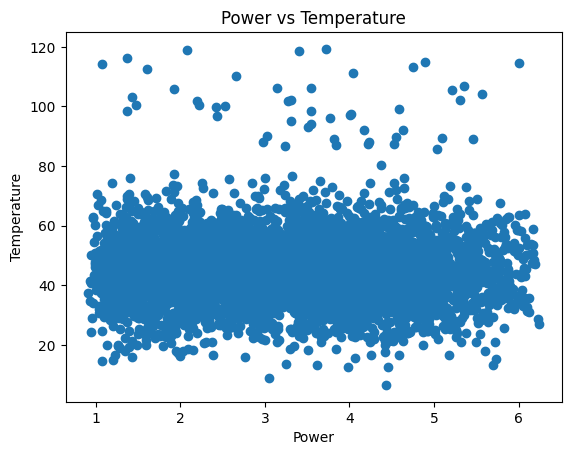

In [13]:
plt.scatter(df["power"], df["Temperature"])
plt.xlabel("Power")
plt.ylabel("Temperature")
plt.title("Power vs Temperature")
plt.show()

In [14]:
df["Sensor_ID"].unique()

array(['S07', 'S20', 'S15', 'S11', 'S08', 'S19', 'S04', 'S03', 'S02',
       'S12', 'S06', 'S01', 'S17', 'S10', 'S16', 'S05', 'S09', 'S18',
       'S14', 'S13'], dtype=object)

In [15]:
sensor1=df[df['Sensor_ID']=="S01"]
sensor1[['Temperature','power']].corr()

,Temperature,power
Temperature,1.000000,0.038277
power,0.038277,1.000000


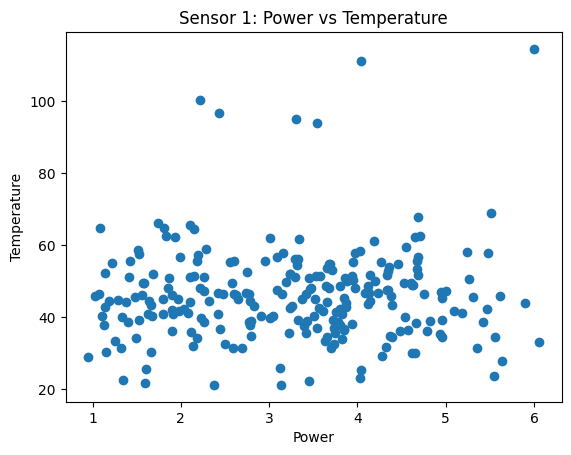

In [16]:
plt.scatter(sensor1["power"], sensor1["Temperature"])
plt.xlabel("Power")
plt.ylabel("Temperature")
plt.title("Sensor 1: Power vs Temperature")
plt.show()

In [26]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.head(10)

,Timestamp,Sensor_ID,Temperature,Voltage,Current,power,volt_z,Curr_z,Temp_z,curr_z
0,2025-01-01 00:00:00,S07,52.356220,4.125585,1.130391,4.663525,1.502686,0.639651,0.605489,0.639651
1,2025-01-01 00:00:00,S20,62.817989,3.990806,1.203538,4.803088,1.116727,0.852174,1.506651,0.852174
2,2025-01-01 00:00:00,S15,28.433768,3.837356,0.481779,1.848756,0.677304,-1.244840,-1.455158,-1.244840
3,2025-01-01 00:00:00,S11,39.755519,3.098680,0.780707,2.419162,-1.437994,-0.376327,-0.479918,-0.376327
4,2025-01-01 00:00:00,S08,37.646965,3.501917,0.879381,3.079519,-0.283272,-0.089639,-0.661546,-0.089639
5,2025-01-01 00:00:00,S07,52.214793,3.671162,0.726825,2.668292,0.201385,-0.532878,0.593306,-0.532878
6,2025-01-01 00:01:00,S19,34.498593,3.224894,0.686535,2.214003,-1.076565,-0.649937,-0.932742,-0.649937
7,2025-01-01 00:01:00,S11,52.574951,3.537872,1.123704,3.975520,-0.180310,0.620222,0.624330,0.620222
8,2025-01-01 00:01:00,S11,58.705361,3.721231,0.559040,2.080316,0.344764,-1.020364,1.152395,-1.020364
9,2025-01-01 00:01:00,S04,51.952029,3.392852,1.151269,3.906085,-0.595593,0.700309,0.570672,0.700309


In [32]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Current'].fillna(df['Current'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
#voltage z score
voltage_mean=df['Voltage'].mean()
voltage_std=df['Voltage'].std()
df['volt_z']=(df['Voltage']-voltage_mean)/voltage_std
print(df['volt_z'].max())
print(df['volt_z'].min())
#current z score
current_mean=df['Current'].mean()
current_std=df['Current'].std()
df['Curr_z']=(df['Current']-current_mean)/current_std
print(df['Curr_z'].max())
print(df['Curr_z'].min())
#temperature z score
temp_mean=df['Temperature'].mean()
temp_std=df['Temperature'].std()
df['Temp_z']=(df['Temperature']-temp_mean)/temp_std
print(df['Temp_z'].max())
print(df['Temp_z'].min())

voltage_anomalies=df[abs(df['volt_z'])>2.5] 
temp_amomalies=df[abs(df['Temp_z'])>3]
current_anomalies=df[abs(df['Curr_z'])>2.5]
df.drop('curr_z',axis=1,inplace=True)


1.715112511627441
-1.7200353101473131
1.7132572216364605
-1.7721027788743084
6.3709320125302815
-3.3330074593277588


C:\Users\cvgog\AppData\Local\Temp\ipykernel_24824\1393252295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
C:\Users\cvgog\AppData\Local\Temp\ipykernel_24824\1393252295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [34]:
df.columns


Index(['Timestamp', 'Sensor_ID', 'Temperature', 'Voltage', 'Current', 'power',
       'volt_z', 'Curr_z', 'Temp_z'],
      dtype='object')

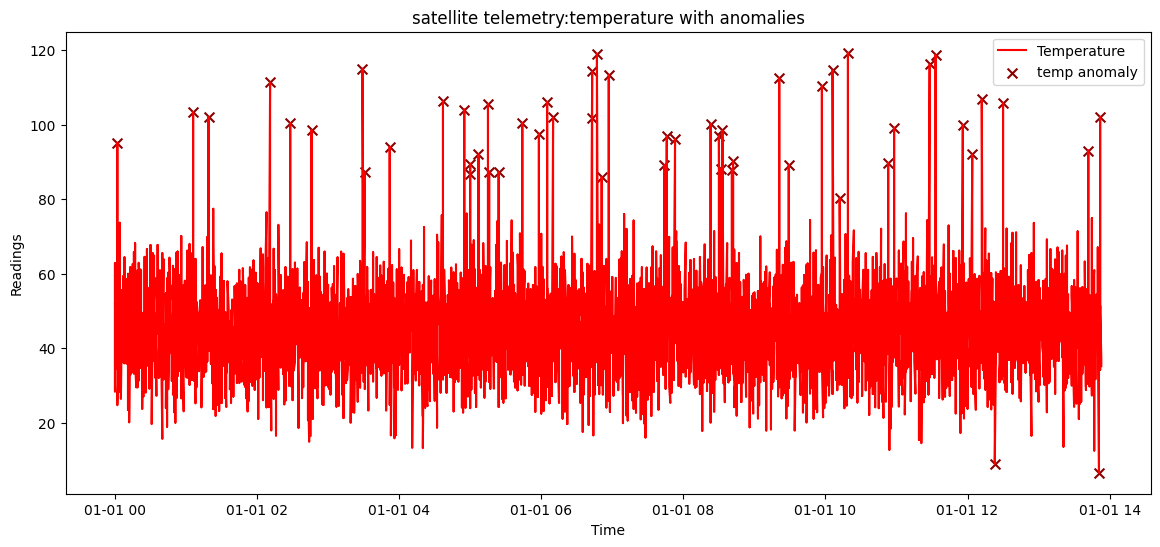

In [35]:
plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'],df['Temperature'],label='Temperature',color='red')
plt.scatter(temp_amomalies['Timestamp'],temp_amomalies['Temperature'],color='darkred',label='temp anomaly',s=50,marker='x')
plt.xlabel("Time")
plt.ylabel('Readings')
plt.title('satellite telemetry:temperature with anomalies')
plt.legend()
plt.show()

In [ ]:
df.figure(1,3,figsize=(14,6))
df.plot()